In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load Store Data
store_df = pd.read_csv("store.csv")

# Fill missing values in CompetitionDistance with median
store_df["CompetitionDistance"] = store_df["CompetitionDistance"].fillna(store_df["CompetitionDistance"].median())

# Fill other missing values with "0" (string type for categorical features)
store_df = store_df.fillna("0")


# Encode categorical variables
labelencoder = LabelEncoder()
store_df["StoreType"] = labelencoder.fit_transform(store_df["StoreType"])
store_df["Assortment"] = labelencoder.fit_transform(store_df["Assortment"])


# Load Train & Test Data
train_df = pd.read_csv("train.csv", dtype={"StateHoliday": str})  # Force StateHoliday to be string
test_df = pd.read_csv("test.csv", dtype={"StateHoliday": str})


# Convert Date to datetime
train_df["Date"] = pd.to_datetime(train_df["Date"])
test_df["Date"] = pd.to_datetime(test_df["Date"])


# Extract date features
for df in [train_df, test_df]:
    df["Year"] = df["Date"].dt.year
    df["Month"] = df["Date"].dt.month
    df["Day"] = df["Date"].dt.day
    df["WeekOfYear"] = df["Date"].dt.isocalendar().week


# Drop original Date column
train_df.drop("Date", axis=1, inplace=True)
test_df.drop("Date", axis=1, inplace=True)


# Encode StateHoliday
labelencoder = LabelEncoder()
train_df["StateHoliday"] = labelencoder.fit_transform(train_df["StateHoliday"])
test_df["StateHoliday"] = labelencoder.fit_transform(test_df["StateHoliday"])

# Handle missing values in "Open" column
train_df["Open"] = train_df["Open"].fillna(0).astype(int)
test_df["Open"] = test_df["Open"].fillna(0).astype(int)

# Merge Train & Test Data with Store Data
train_df1 = train_df.merge(store_df, on="Store", how="left")
test_df1 = test_df.merge(store_df, on="Store", how="left")


# Ensure PromoInterval is always a string
train_df1["PromoInterval"] = train_df1["PromoInterval"].fillna("").astype(str)


# One-hot encode PromoInterval into separate month columns
for month in ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]:
    train_df1[f"Promo_{month}"] = train_df1["PromoInterval"].apply(lambda x: 1 if month in str(x) else 0)


In [ ]:

# Drop original PromoInterval column
train_df1.drop("PromoInterval", axis=1, inplace=True)

# Encode remaining categorical variables
for col in ["Promo2SinceWeek", "Promo2SinceYear", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear"]:
    train_df1[col] = labelencoder.fit_transform(train_df1[col].astype(str))

# Select Features & Target
x = train_df1.drop(["Store", "Customers", "Sales"], axis=1)  # Features
y = train_df1["Sales"]  # Target



In [25]:
# Split Data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)



In [26]:
# Train Model
model = RandomForestRegressor(n_estimators=20, random_state=42)
model.fit(x_train, y_train)



RandomForestRegressor(n_estimators=20, random_state=42)

In [27]:
# Predict on Test Set
y_pred = model.predict(x_test)

# Evaluate Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print Results
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 806733.0216926547
R² Score: 0.9456367269676058


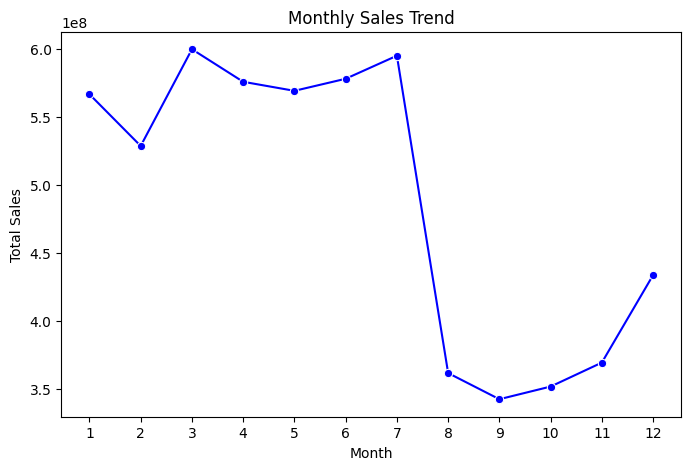

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by Month and sum sales
monthly_sales = train_df.groupby("Month")["Sales"].sum().reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(x="Month", y="Sales", data=monthly_sales, marker="o", color="b")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Monthly Sales Trend")
plt.xticks(range(1, 13))
plt.show()

In [2]:
x_train


NameError: name 'x_train' is not defined

In [30]:
train_df1.to_csv("FinalCleanedData.csv")

In [31]:
test_df1.to_csv("FinalTestData.CSV")

In [32]:
import pickle

# Save the trained model as a .pkl file
with open('SalePrediction.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

print("Model saved successfully!")

Model saved successfully!
